In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

Matplotlib is building the font cache; this may take a moment.


In [2]:
train = pd.read_csv(r'D:\Hacker\dataset\train.csv', index_col = "Patient Id")
test = pd.read_csv(r'D:\Hacker\dataset\test.csv')

In [3]:
indexes = test['Patient Id']

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
train.rename(columns={'Heart Rate (rates/min' : 'Heart Rate'},inplace=True)
test.rename(columns={'Heart Rate (rates/min' : 'Heart Rate'},inplace=True)

In [6]:
train.head()

,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,Mother's age,Father's age,Institute Name,Location of Institute,Status,Respiratory Rate (breaths/min),Heart Rate,Test 1,Test 2,Test 3,Test 4,Test 5,Parental consent,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
Patient Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,NaN,NaN,Boston Specialty & Rehabilitation Hospital,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Alive,Normal (30-60),Normal,0.0,NaN,NaN,1.0,0.0,Yes,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,NaN,23.0,St. Margaret's Hospital For Women,"1515 COMMONWEALTH AV\nALLSTON/BRIGHTON, MA 021...",Deceased,Tachypnea,Normal,NaN,0.0,0.0,1.0,0.0,Yes,High,NaN,No,None,NaN,Yes,Yes,Not applicable,Not applicable,No,Yes,NaN,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,41.0,22.0,NaN,-,Alive,Normal (30-60),Tachycardia,0.0,0.0,0.0,1.0,0.0,Yes,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,21.0,NaN,NaN,"55 FRUIT ST\nCENTRAL, MA 02114\n(42.3624748574...",Deceased,Tachypnea,Normal,0.0,0.0,0.0,1.0,0.0,Yes,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,32.0,NaN,Carney Hospital,"300 LONGWOOD AV\nFENWAY/KENMORE, MA 02115\n(42...",Alive,Tachypnea,Tachycardia,0.0,0.0,0.0,1.0,0.0,NaN,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [7]:
train['Follow-up'].unique()

array(['High', 'Low', nan], dtype=object)

<AxesSubplot:>

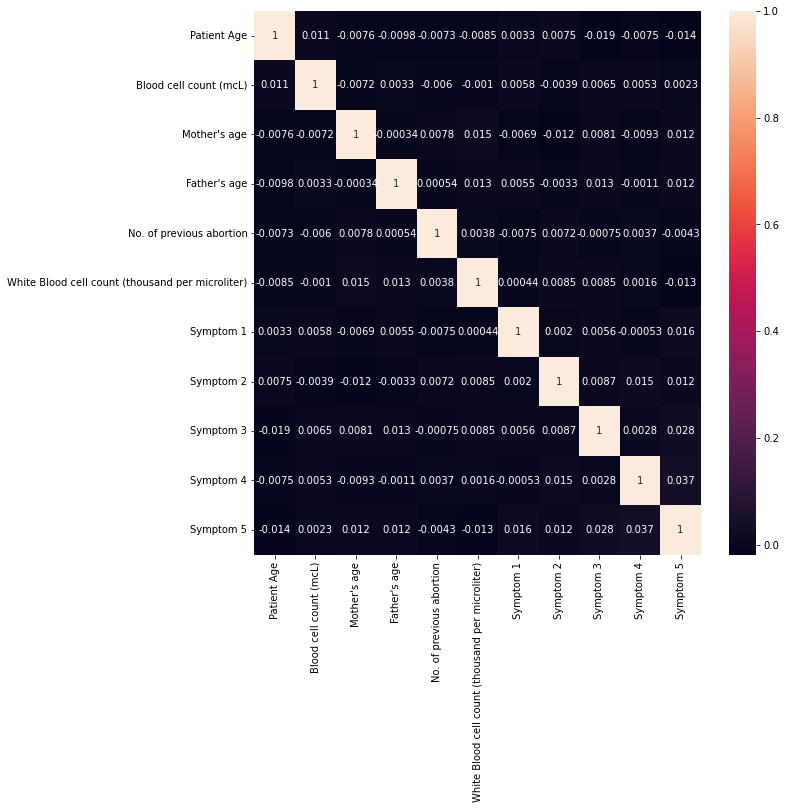

In [8]:
co = train.drop(['Test 1','Test 2','Test 3', 'Test 4','Test 5'],axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(data= co.corr(),annot=True)

In [9]:
float_col = [col for col in train.columns if train[col].dtype == 'float64']

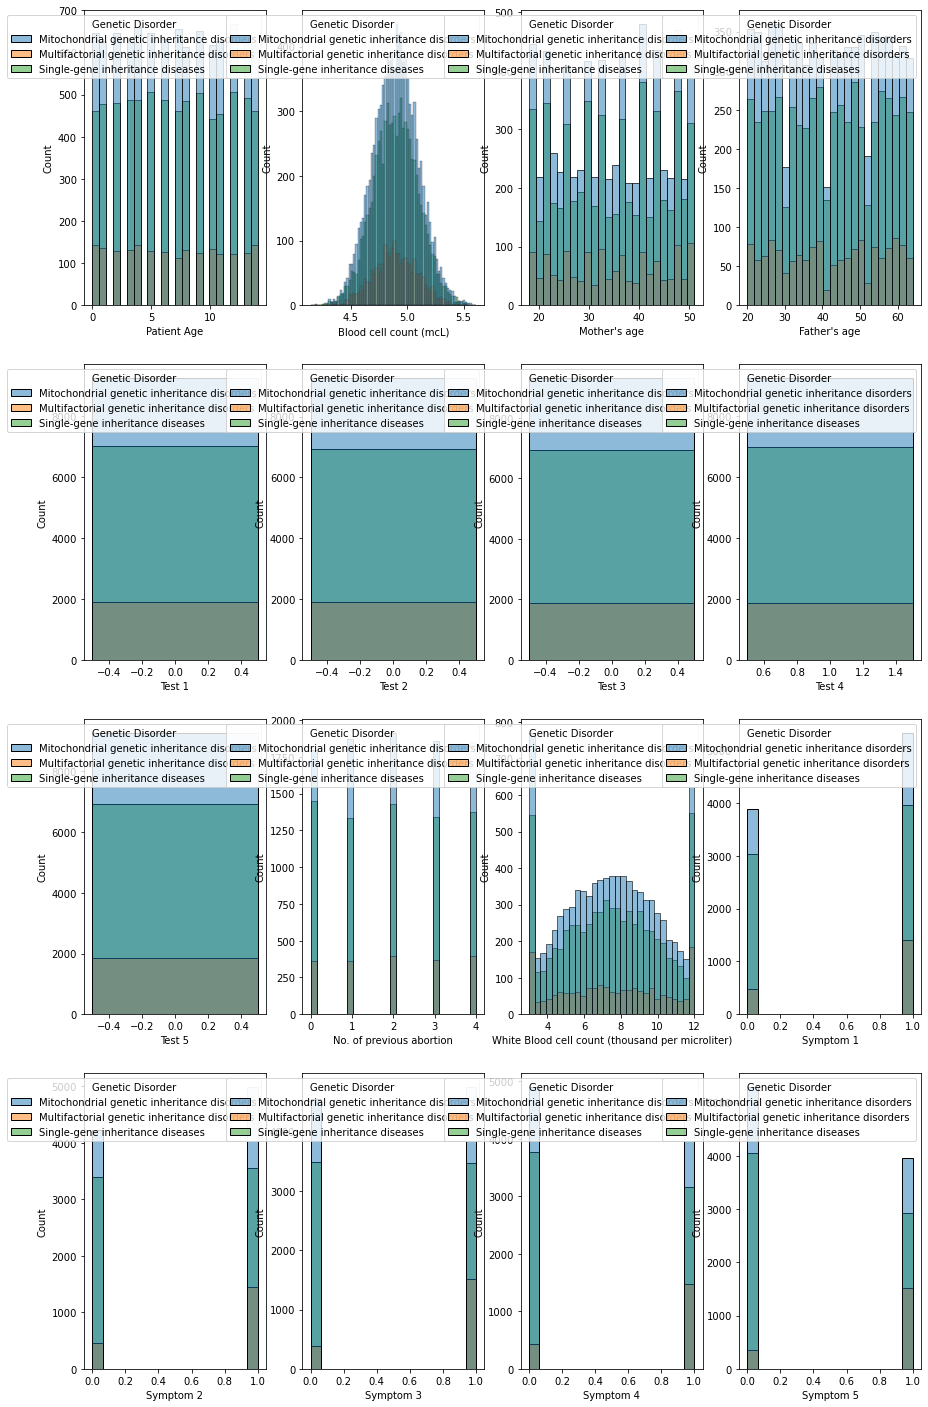

In [10]:
plt.figure(figsize=(15,25))
for i in enumerate(float_col):
    plt.subplot(4,4,i[0]+1)
    sns.histplot(x=train[i[1]],hue=train['Genetic Disorder'])

From the above graphs we have to convert all symptoms 1 to 5 i.e the last 5 plots to categorical variables.
Tests 1-5 do not provide much information...similar to The age of mother and father
Blood cell count variable appears to be normally distributed.
White blood cell count appear normal but with outliers.
No. of abortions also seemes irrelevant for the given target variable 

In [11]:
train.drop(['Patient Age','Patient First Name', 'Family Name', "Father's name", "Mother's age","Father's age", 
            'Institute Name', 'Location of Institute','Test 1','Test 2','Test 3','Test 4', 'Test 5',
            'Parental consent','Status'],axis=1,inplace=True)
            
test.drop(['Patient Age','Patient First Name', 'Family Name', "Father's name", "Mother's age","Father's age", 
            'Institute Name', 'Location of Institute','Test 1','Test 2','Test 3','Test 4', 'Test 5',
           'Parental consent','Status'],axis=1,inplace=True)

In [12]:
test.head()

,Patient Id,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
0,PID0x4175,No,Yes,No,No,4.981655,Tachypnea,Normal,Low,Male,Yes,Not applicable,Institute,Yes,No,Yes,-,No,-99,2,Multiple,-99.000000,slightly abnormal,True,True,True,True,True
1,PID0x21f5,Yes,No,NaN,Yes,5.118890,NaN,-99,Low,Male,Yes,Not applicable,-99,Yes,No,-99,-99,No,Yes,-99,Multiple,8.179584,normal,False,False,False,True,False
2,PID0x49b8,No,NaN,No,No,4.876204,NaN,Normal,Low,Ambiguous,Not available,-99,Institute,No,Yes,Yes,Yes,Yes,No,0,Singular,-99.000000,slightly abnormal,False,False,True,True,False
3,PID0x2d97,No,Yes,Yes,No,4.687767,-99,-99,Low,Ambiguous,No,Not applicable,-99,Yes,Yes,-,-99,-99,Yes,-99,Singular,6.884071,normal,True,False,True,False,True
4,PID0x58da,No,NaN,NaN,Yes,5.152362,Tachypnea,NaN,Low,Ambiguous,No,None,Home,Yes,Yes,Yes,Not applicable,No,No,-99,Multiple,6.195178,normal,True,True,True,True,False


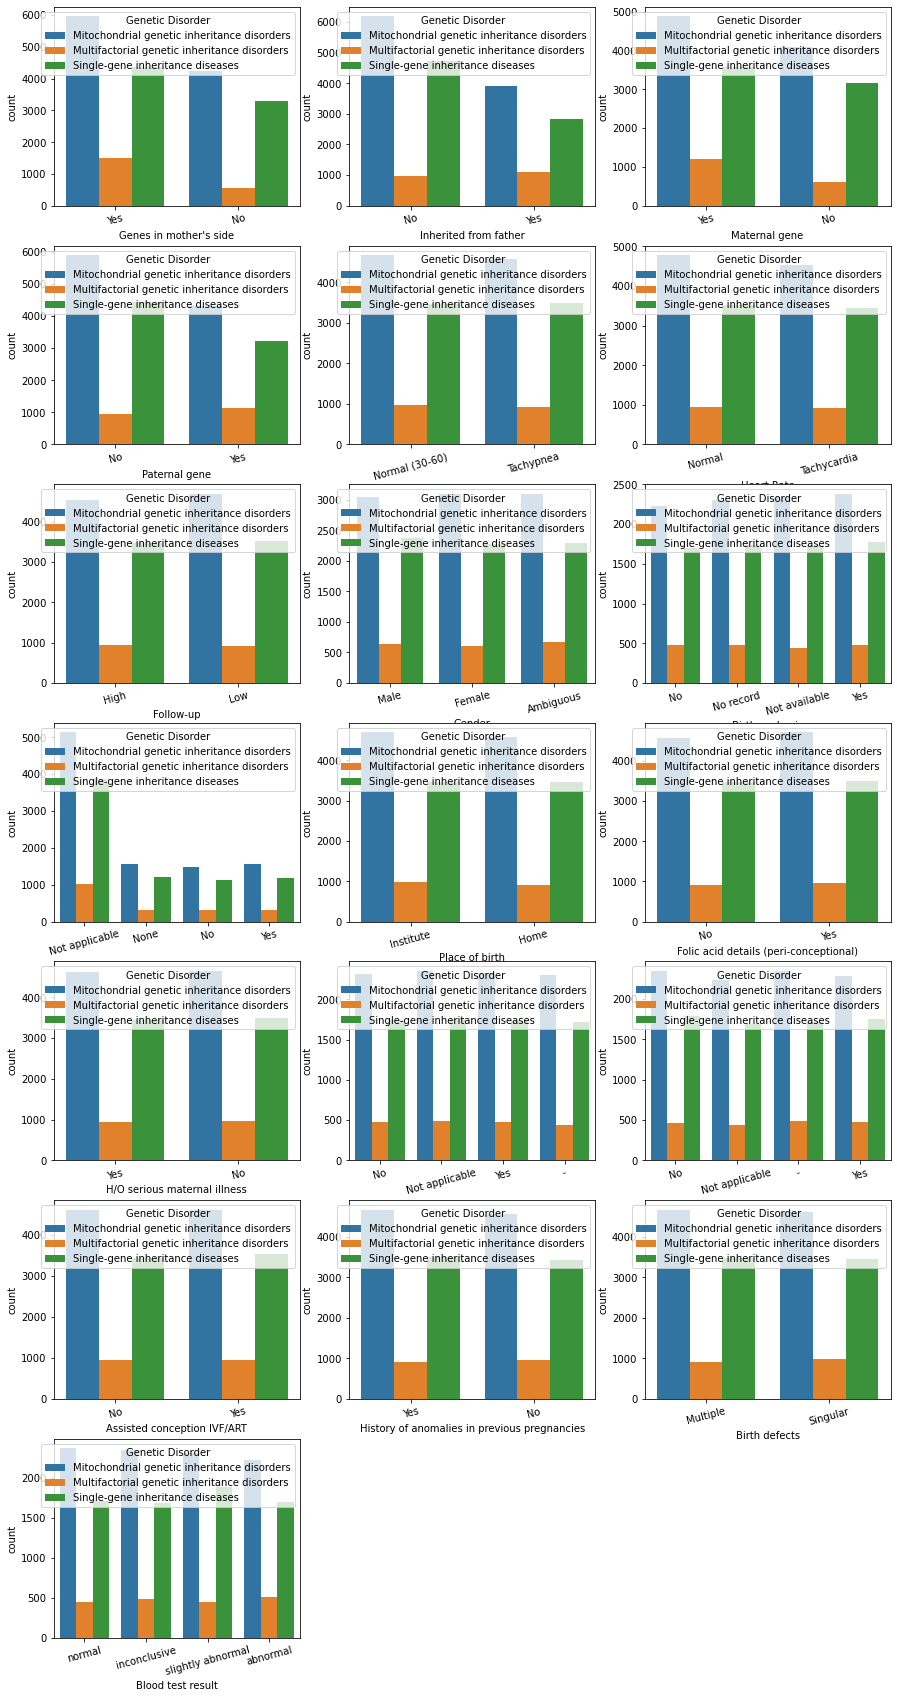

In [13]:
categorical = [col for col in train.columns if train[col].dtype == 'object']
categorical.pop()
categorical.pop()
plt.figure(figsize = (15,30))
for i in enumerate(categorical):
    plt.subplot(7,3,i[0]+1)
    sns.countplot(x=train[i[1]],hue=train['Genetic Disorder'])
    plt.xticks(rotation=15)

<AxesSubplot:xlabel='Genetic Disorder', ylabel='count'>

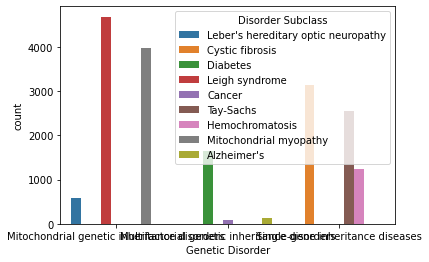

In [14]:
sns.countplot(data=train, x = 'Genetic Disorder', hue = 'Disorder Subclass')

Mitochondrial genetic disorder occurs if one parent's mutated gene is passed on   
For single gene both parents gene are required



In [15]:
train.dropna(subset=['Genetic Disorder'],inplace=True)
train.dropna(subset=['Disorder Subclass'],inplace=True)

In [16]:
train.shape

(18047, 29)

<AxesSubplot:ylabel='Patient Id'>

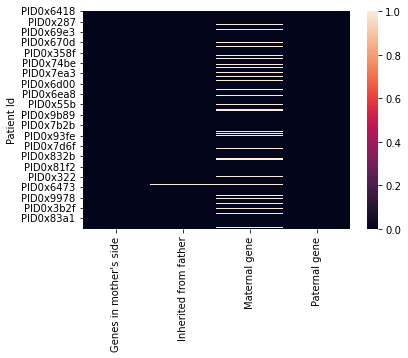

In [17]:
df1 = train[['Genes in mother\'s side', 'Inherited from father','Maternal gene','Paternal gene']]
sns.heatmap(df1.isna())

In [18]:
a1,a2 = train['White Blood cell count (thousand per microliter)'].min(), train['White Blood cell count (thousand per microliter)'].max()
l1 = list()
l1.append(a1)
l1.append(a2)
print(l1)

[3.0, 12.0]


In [19]:
test['Gender'].unique()

array(['Male', 'Ambiguous', '-99', 'Female'], dtype=object)

In [20]:
train.head()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Place of birth,Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,History of anomalies in previous pregnancies,No. of previous abortion,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
Patient Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
PID0x6418,Yes,No,Yes,No,4.760603,Normal (30-60),Normal,High,NaN,NaN,Not applicable,Institute,No,NaN,No,No,No,Yes,NaN,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
PID0x4a82,Yes,No,No,No,4.893297,Normal (30-60),Tachycardia,Low,NaN,No record,Not applicable,NaN,Yes,No,Yes,NaN,Yes,Yes,4.0,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
PID0x4ac8,Yes,No,Yes,No,4.705280,Tachypnea,Normal,High,Male,Not available,No,Institute,No,Yes,-,Not applicable,NaN,Yes,1.0,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
PID0x1bf7,Yes,No,NaN,Yes,4.720703,Tachypnea,Tachycardia,Low,Male,Not available,Not applicable,Institute,No,Yes,-,Not applicable,Yes,No,4.0,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer
PID0x44fe,Yes,No,Yes,No,5.103188,NaN,Normal,Low,Female,Not available,None,Institute,No,No,No,No,NaN,No,0.0,Multiple,10.272230,normal,1.0,0.0,0.0,1.0,0.0,Single-gene inheritance diseases,Cystic fibrosis


In [21]:
# Converting categorical features
train['Genes in mother\'s side'] = train['Genes in mother\'s side'].map({'Yes' : 1, 'No': 0})
train['Inherited from father'] = train['Inherited from father'].map({'Yes' : 1, 'No' : 0})
train['Maternal gene'] = train['Maternal gene'].map({'Yes':1,'No':0})
train['Paternal gene'] = train['Paternal gene'].map({'Yes':1,'No':0})
train['Gender'] = train['Gender'].map({'Male': 0, 'Female':1, 'Ambiguous':2})
train['Heart Rate'] = train['Heart Rate'].map({'Normal' : 1,'Tachycardia': 0})
train['Respiratory Rate (breaths/min)'] = train['Respiratory Rate (breaths/min)'].map({'Normal (30-60)':1,'Tachypnea':0})
train['Follow-up'] = train['Follow-up'].map({'High':1,'Low':0})
train['Autopsy shows birth defect (if applicable)'] = train['Autopsy shows birth defect (if applicable)'].map({'Not applicable': 0,'No':1,'Yes':2,'None':3})
train['Folic acid details (peri-conceptional)'] = train['Folic acid details (peri-conceptional)'].map({'Yes':1,'No':0})
train['H/O serious maternal illness'] = train['H/O serious maternal illness'].map({'Yes':1, 'No':0})
train['H/O radiation exposure (x-ray)'] = train['H/O radiation exposure (x-ray)'].map({'No':0,'Yes':1,'Not applicable':2})
train['H/O substance abuse'] = train['H/O substance abuse'].map({'No':0,'Yes':1,'Not applicable':2})
train['Assisted conception IVF/ART'] = train['Assisted conception IVF/ART'].map({'Yes':1, 'No':0})
train['Birth asphyxia'] = train['Birth asphyxia'].map({'Yes':1,'No':0,'Not available':2,'No record':3,'-99':3})
train['Genetic Disorder'] = train['Genetic Disorder'].map({'Mitochondrial genetic inheritance disorders':1,'Multifactorial genetic inheritance disorders':2,
                                                          'Single-gene inheritance diseases':3})
train['Disorder Subclass'] = train['Disorder Subclass'].map({"Leber's hereditary optic neuropathy":1,'Diabetes':2,
                                                            'Leigh syndrome':3,'Cancer':4,'Cystic fibrosis':5,'Tay-Sachs':6,
                                                            'Hemochromatosis':7,'Mitochondrial myopathy':8,"Alzheimer's":9})

In [22]:
test['Genes in mother\'s side'] = test['Genes in mother\'s side'].map({'Yes' : 1, 'No': 0,'-99': 2})
test['Inherited from father'] = test['Inherited from father'].map({'Yes':1 ,'No' : 0,'-99': 2})
test['Gender'] = test['Gender'].map({'Male': 0, 'Female':1, 'Ambiguous':2,'-99': 2})
test['Maternal gene'] = test['Maternal gene'].map({'Yes':1,'No':0})
test['Paternal gene'] = test['Paternal gene'].map({'Yes':1,'No':0,'-99': 2})
test['Heart Rate'] = test['Heart Rate'].map({'Normal' : 1,'Tachycardia': 0,'-99': 2})
test['Respiratory Rate (breaths/min)'] = test['Respiratory Rate (breaths/min)'].map({'Normal (30-60)':1,'Tachypnea':0,'-99': 2})
test['Follow-up'] = test['Follow-up'].map({'High':1,'Low':0,'-99': 2})
test['Autopsy shows birth defect (if applicable)'] = test['Autopsy shows birth defect (if applicable)'].map({'Not applicable': 0,'No':1,'Yes':2,'None':3,'-99': 2})
test['Folic acid details (peri-conceptional)'] = test['Folic acid details (peri-conceptional)'].map({'Yes':1,'No':0,'-99': 2})
test['H/O serious maternal illness'] = test['H/O serious maternal illness'].map({'Yes':1, 'No':0,'-99': 2})
test['H/O radiation exposure (x-ray)'] = test['H/O radiation exposure (x-ray)'].map({'No':0,'Yes':1,'Not applicable':2,'-99': 2})
test['H/O substance abuse'] = test['H/O substance abuse'].map({'No':0,'Yes':1,'Not applicable':2,'-99': 2})
test['Assisted conception IVF/ART'] = test['Assisted conception IVF/ART'].map({'Yes':1, 'No':0,'-99': 2})
test['Symptom 1'] = test['Symptom 1'].map({True:1.0,False:0.0})
test['Symptom 2'] = test['Symptom 2'].map({True:1.0,False:0.0})
test['Symptom 3'] = test['Symptom 3'].map({True:1.0,False:0.0})
test['Symptom 4'] = test['Symptom 4'].map({True:1.0,False:0.0})
test['Symptom 5'] = test['Symptom 5'].map({True:1.0,False:0.0})
test['Birth asphyxia'] = test['Birth asphyxia'].map({'Yes':1,'No':0,'Not available':2,'No record':3,'-99':3})

In [23]:
test['Maternal gene'].unique()

array([ 0., nan,  1.])

In [24]:
# Eliminating some more columns
train.drop(['Place of birth','History of anomalies in previous pregnancies','Blood test result',
            'Birth defects'],axis=1,inplace=True)
test.drop(['Place of birth','History of anomalies in previous pregnancies','Blood test result',
            'Birth defects'],axis=1,inplace=True)

In [25]:
# #Filling missing values
train['Inherited from father'] = train['Inherited from father'].fillna(0)
train['Gender'] = train['Gender'].fillna(2)
train['Blood cell count (mcL)'] = train['Blood cell count (mcL)'].fillna(train['Blood cell count (mcL)'].mean())
train['Maternal gene'] = train['Maternal gene'].fillna(test['Maternal gene'].mode()[0])
train['Respiratory Rate (breaths/min)'] = train['Respiratory Rate (breaths/min)'].fillna(train['Respiratory Rate (breaths/min)'].median())
train['Heart Rate'] = train['Heart Rate'].fillna(train['Heart Rate'].median())
train['Follow-up'] = train['Follow-up'].fillna(train['Follow-up'].median())
train['Autopsy shows birth defect (if applicable)'] = train['Autopsy shows birth defect (if applicable)'].fillna(train['Autopsy shows birth defect (if applicable)'].median())
train['Folic acid details (peri-conceptional)'] = train['Folic acid details (peri-conceptional)'].fillna(train['Folic acid details (peri-conceptional)'].median())
train['H/O radiation exposure (x-ray)'] = train['H/O radiation exposure (x-ray)'].fillna(train['H/O radiation exposure (x-ray)'].median())
train['H/O serious maternal illness'] = train['H/O serious maternal illness'].fillna(train['H/O serious maternal illness'].median())
train['H/O substance abuse'] = train['H/O substance abuse'].fillna(train['H/O substance abuse'].median())
train['Assisted conception IVF/ART'] = train['Assisted conception IVF/ART'].fillna(train['Assisted conception IVF/ART'].median())
train['No. of previous abortion'] = train['No. of previous abortion'].fillna(train['No. of previous abortion'].median())
train['White Blood cell count (thousand per microliter)'] = train['White Blood cell count (thousand per microliter)'].fillna(train['White Blood cell count (thousand per microliter)'].mean())
train['Symptom 1'] = train['Symptom 1'].fillna(0)
train['Symptom 2'] = train['Symptom 2'].fillna(0)
train['Symptom 3'] = train['Symptom 3'].fillna(0)
train['Symptom 4'] = train['Symptom 4'].fillna(0)
train['Symptom 5'] = train['Symptom 5'].fillna(0)
train['Birth asphyxia'] = train['Birth asphyxia'].fillna(3)

In [26]:
test['Inherited from father'] = test['Inherited from father'].fillna(test['Inherited from father'].mode()[0])
test['Maternal gene'] = test['Maternal gene'].fillna(test['Maternal gene'].mode()[0])
test['Gender'] = test['Gender'].fillna(2)
test['Respiratory Rate (breaths/min)'] = test['Respiratory Rate (breaths/min)'].fillna(test['Respiratory Rate (breaths/min)'].median())
test['Heart Rate'] = test['Heart Rate'].fillna(test['Heart Rate'].median())
test['Follow-up'] = test['Follow-up'].fillna(test['Follow-up'].median())
test['Autopsy shows birth defect (if applicable)'] = test['Autopsy shows birth defect (if applicable)'].fillna(test['Autopsy shows birth defect (if applicable)'].median())
test['Folic acid details (peri-conceptional)'] = test['Folic acid details (peri-conceptional)'].fillna(test['Folic acid details (peri-conceptional)'].median())
test['H/O radiation exposure (x-ray)'] = test['H/O radiation exposure (x-ray)'].fillna(test['H/O radiation exposure (x-ray)'].median())
test['H/O serious maternal illness'] = test['H/O serious maternal illness'].fillna(test['H/O serious maternal illness'].median())
test['H/O substance abuse'] = test['H/O substance abuse'].fillna(test['H/O substance abuse'].median())
test['Assisted conception IVF/ART'] = test['Assisted conception IVF/ART'].fillna(test['Assisted conception IVF/ART'].median())

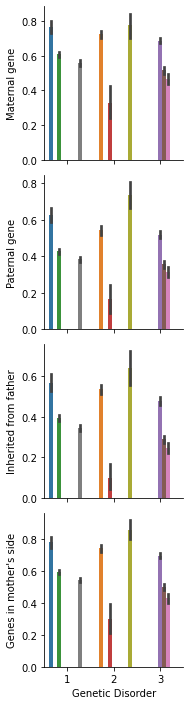

In [27]:
g = sns.PairGrid(train, x_vars=['Genetic Disorder'], y_vars=['Maternal gene','Paternal gene', 'Inherited from father',"Genes in mother's side"],
                hue = 'Disorder Subclass',aspect = 1.1)
ax = g.map(sns.barplot)

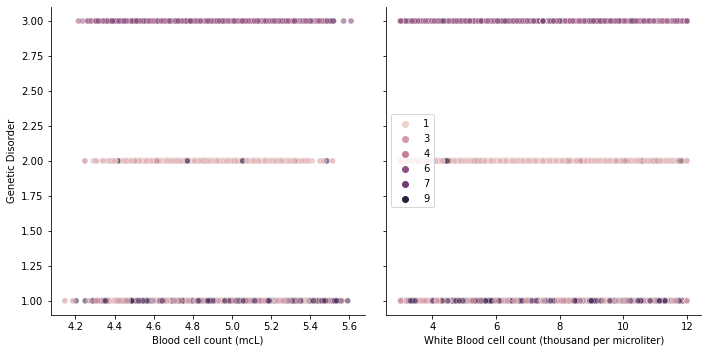

In [28]:
g1 = sns.PairGrid(train,y_vars=['Genetic Disorder'],x_vars=['Blood cell count (mcL)','White Blood cell count (thousand per microliter)'],
                 hue = 'Disorder Subclass',height = 5.0)
ax1 = g1.map(sns.scatterplot,alpha=0.6)
plt.legend()

In [29]:
train.head()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
Patient Id,,,,,,,,,,,,,,,,,,,,,,,,,
PID0x6418,1,0.0,1.0,0,4.760603,1.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.857562,1.0,1.0,1.0,1.0,1.0,1,1
PID0x4a82,1,0.0,0.0,0,4.893297,1.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0,7.475740,0.0,1.0,1.0,1.0,1.0,2,2
PID0x4ac8,1,0.0,1.0,0,4.705280,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,7.919321,0.0,0.0,1.0,0.0,0.0,1,3
PID0x1bf7,1,0.0,1.0,1,4.720703,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,4.0,4.098210,0.0,0.0,0.0,0.0,0.0,2,4
PID0x44fe,1,0.0,1.0,0,5.103188,1.0,1.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,10.272230,1.0,0.0,0.0,1.0,0.0,3,5


In [30]:
# After the completion of this operation the first digit is the Genetic Disorder and the 2nd represents Disorder Subclass
train['target'] = train['Genetic Disorder'].astype(str) + train['Disorder Subclass'].astype(str)
train['target'] = train['target'].apply(lambda x: int(x))

In [31]:
X = train.drop(['Genetic Disorder', 'Disorder Subclass','target'],axis=1)
y = train.target

In [32]:
X.head()

,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Respiratory Rate (breaths/min),Heart Rate,Follow-up,Gender,Birth asphyxia,Autopsy shows birth defect (if applicable),Folic acid details (peri-conceptional),H/O serious maternal illness,H/O radiation exposure (x-ray),H/O substance abuse,Assisted conception IVF/ART,No. of previous abortion,White Blood cell count (thousand per microliter),Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5
Patient Id,,,,,,,,,,,,,,,,,,,,,,,
PID0x6418,1,0.0,1.0,0,4.760603,1.0,1.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,9.857562,1.0,1.0,1.0,1.0,1.0
PID0x4a82,1,0.0,0.0,0,4.893297,1.0,0.0,0.0,2.0,3.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0,7.475740,0.0,1.0,1.0,1.0,1.0
PID0x4ac8,1,0.0,1.0,0,4.705280,0.0,1.0,1.0,0.0,2.0,1.0,0.0,1.0,1.0,2.0,1.0,1.0,7.919321,0.0,0.0,1.0,0.0,0.0
PID0x1bf7,1,0.0,1.0,1,4.720703,0.0,0.0,0.0,0.0,2.0,0.0,0.0,1.0,1.0,2.0,1.0,4.0,4.098210,0.0,0.0,0.0,0.0,0.0
PID0x44fe,1,0.0,1.0,0,5.103188,1.0,1.0,0.0,1.0,2.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,10.272230,1.0,0.0,0.0,1.0,0.0


In [33]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
cols = X.columns
for col in cols:
    X[col] = sc.fit_transform(X[col].values.reshape(-1,1))
    test[col] = sc.transform(test[col].values.reshape(-1,1))

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y,random_state=1, test_size=0.2)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features=9, n_estimators=500)

In [36]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_features=9, n_estimators=500)

In [37]:
# clf.best_estimator_

In [38]:
p1 = rf.predict(X_test)

In [39]:
from sklearn.metrics import accuracy_score
print(accuracy_score(p1,y_test))

0.39362880886426593


In [40]:
# from xgboost import XGBClassifier
# xg = XGBClassifier(n_estimators=200)

In [41]:
# xg.fit(X_train,y_train)

In [42]:
# p2 = xg.predict(X_test)
# print(accuracy_score(y_test,p2))

In [43]:
test.drop('Patient Id',axis=1,inplace=True)
# test_target2 = xg.predict(test)

In [44]:
test_target = rf.predict(test)

In [45]:
submission = pd.DataFrame(columns=['Patient Id','Genetic Disorder', 'Disorder Subclass', 'target'])

In [46]:
submission['Patient Id'] = indexes

In [47]:
submission['target'] = test_target

In [48]:
submission.head()

,Patient Id,Genetic Disorder,Disorder Subclass,target
0,PID0x4175,NaN,NaN,22
1,PID0x21f5,NaN,NaN,36
2,PID0x49b8,NaN,NaN,18
3,PID0x2d97,NaN,NaN,13
4,PID0x58da,NaN,NaN,35


In [49]:
submission['Genetic Disorder'] = submission['target'].apply(lambda x: [int(n) for n in str(x)][0])
submission['Disorder Subclass'] = submission['target'].apply(lambda x: [int(n) for n in str(x)][1])
# submission['Genetic Disorder'] = test_target
# submission['Disorder Subclass'] = test_subclass
# submission.head()

In [50]:
submission.drop(['target'],axis=1,inplace=True)

In [51]:
submission['Genetic Disorder'] = submission['Genetic Disorder'].map({1:'Mitochondrial genetic inheritance disorders',
                                                                     2:'Multifactorial genetic inheritance disorders',
                                                                     3:'Single-gene inheritance diseases'})
submission['Disorder Subclass'] = submission['Disorder Subclass'].map({1:"Leber's hereditary optic neuropathy",
                                                                       2:'Diabetes',
                                                                       3:'Leigh syndrome',
                                                                       4:'Cancer',
                                                                       5:'Cystic fibrosis',
                                                                       6:'Tay-Sachs',
                                                                       7:'Hemochromatosis',
                                                                       8:'Mitochondrial myopathy',
                                                                       9: "Alzheimer's"})

In [52]:
submission.to_csv('D:\Hacker\dataset\submission.csv')

In [53]:
submission.shape

(9465, 3)

In [54]:
rf.feature_importances_

array([0.02386132, 0.02498157, 0.02579694, 0.0267514 , 0.14956651,
       0.02810578, 0.02776319, 0.02773091, 0.04537266, 0.05774713,
       0.04936851, 0.02791585, 0.02791608, 0.04371149, 0.04286219,
       0.02746365, 0.06780821, 0.13904619, 0.02273425, 0.02385154,
       0.02747215, 0.028071  , 0.03410147])

In [55]:
X.shape

(18047, 23)

In [56]:
X.columns

Index(['Genes in mother's side', 'Inherited from father', 'Maternal gene',
       'Paternal gene', 'Blood cell count (mcL)',
       'Respiratory Rate (breaths/min)', 'Heart Rate', 'Follow-up', 'Gender',
       'Birth asphyxia', 'Autopsy shows birth defect (if applicable)',
       'Folic acid details (peri-conceptional)',
       'H/O serious maternal illness', 'H/O radiation exposure (x-ray)',
       'H/O substance abuse', 'Assisted conception IVF/ART',
       'No. of previous abortion',
       'White Blood cell count (thousand per microliter)', 'Symptom 1',
       'Symptom 2', 'Symptom 3', 'Symptom 4', 'Symptom 5'],
      dtype='object')